In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv("./data/08_loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# 1 데이터 구조 파악

In [4]:
df.shape

(4269, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
# 컬럼명에 있는 공백 제거
df.columns = df.columns.str.strip()

In [8]:
df['loan_status'].value_counts(normalize=True)

loan_status
Approved    0.62216
Rejected    0.37784
Name: proportion, dtype: float64

In [9]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

# 2 결측치 처리

In [15]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [16]:
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

# 3 범주형 안코딩

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
encoder = LabelEncoder()

In [31]:
df['education'] = encoder.fit_transform(df['education'])
df['education']

0       0
1       1
2       0
3       0
4       1
       ..
4264    0
4265    1
4266    1
4267    1
4268    0
Name: education, Length: 4269, dtype: int64

In [32]:
df['self_employed'] = encoder.fit_transform(df['self_employed'])
df['self_employed']

0       0
1       1
2       0
3       0
4       1
       ..
4264    1
4265    1
4266    0
4267    0
4268    0
Name: self_employed, Length: 4269, dtype: int64

In [12]:
df[['education','self_employed']].head()

In [35]:
df['loan_status']

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


# 4. 학습/테스트 분리

In [36]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [41]:
print(X_train.shape)
print(X_test.shape)

(3415, 12)
(854, 12)


# 5 결정트리 학습 및 과적합 확인

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
# max_depth 미지정
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)
pred = dtc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    Approved       0.97      0.99      0.98       531
    Rejected       0.98      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



In [48]:
# max_depth 지정
dtc2 = DecisionTreeClassifier(max_depth=3,random_state=42)
dtc2.fit(X_train,y_train)
pred2 = dtc2.predict(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

    Approved       0.99      0.96      0.98       531
    Rejected       0.94      0.99      0.96       323

    accuracy                           0.97       854
   macro avg       0.97      0.98      0.97       854
weighted avg       0.97      0.97      0.97       854



가지치기(max_depth 제한)가 과적합을 줄였는지 해석하세요.
* 큰 변화는 없는거 같다,

# 6. 결정트리 시각화

In [49]:
from sklearn.tree import plot_tree

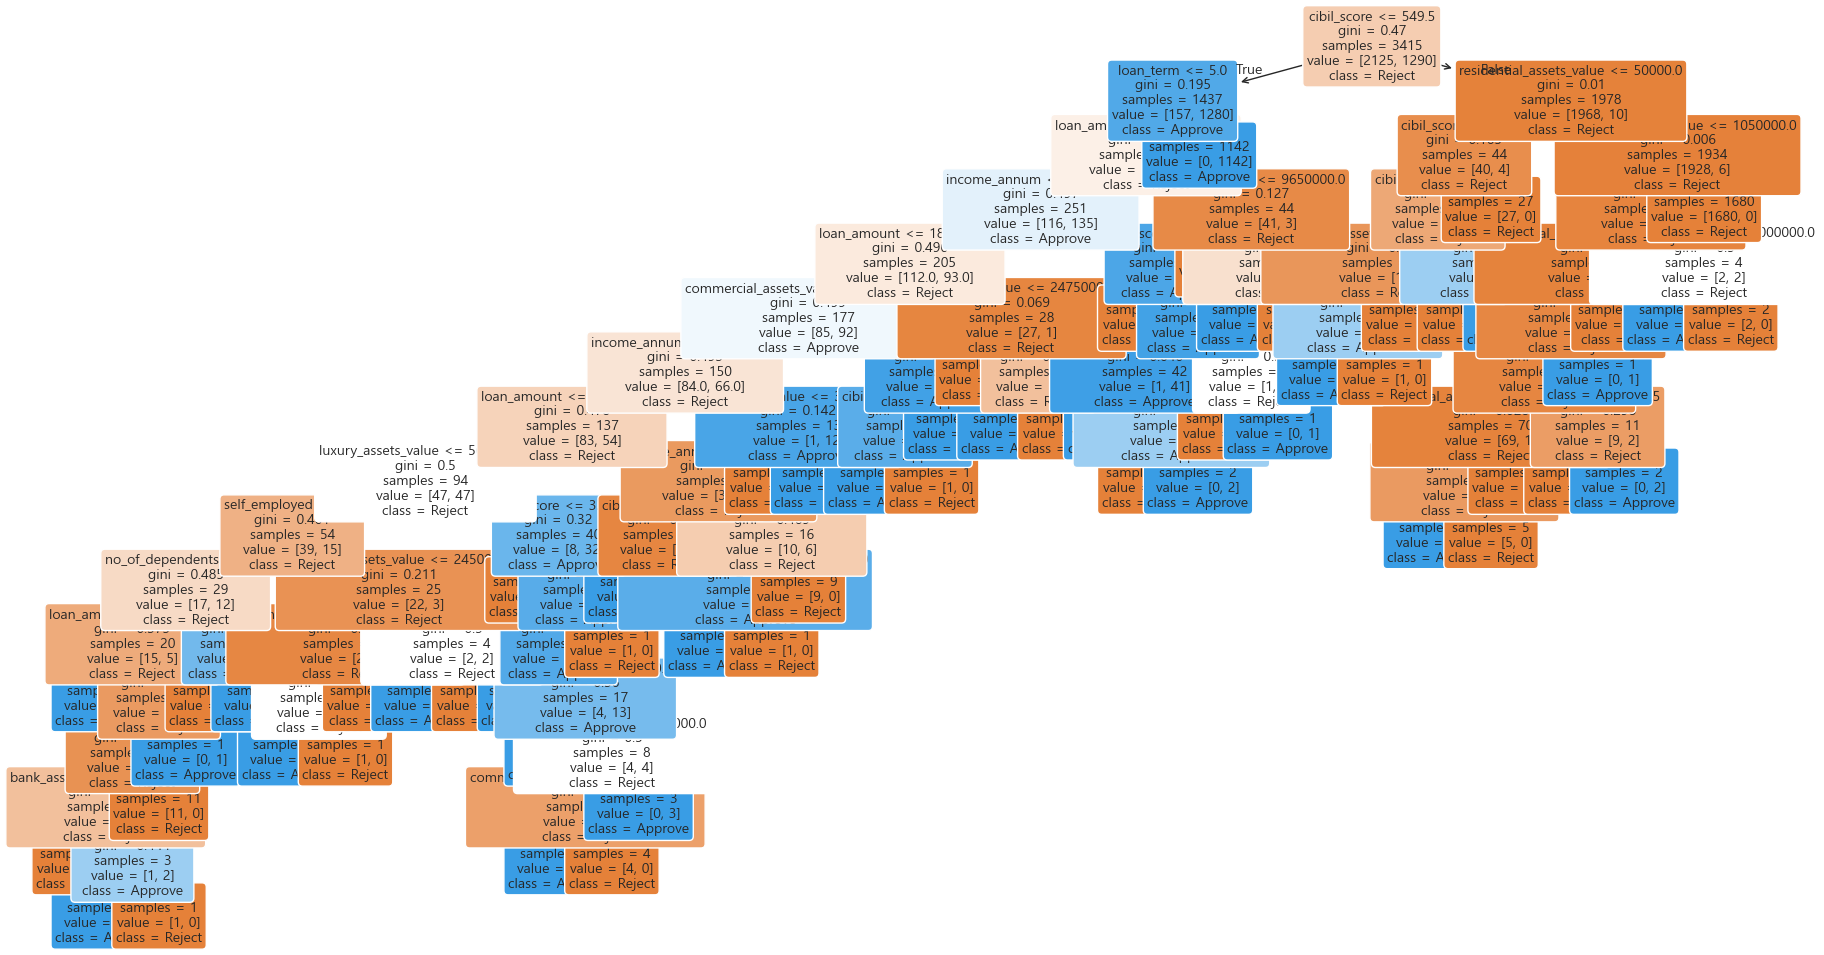

In [52]:
plt.figure(figsize=(22,12))
plot_tree(dtc,filled=True,rounded=True,fontsize=10,feature_names=X.columns,class_names=['Reject','Approve'])
plt.show()

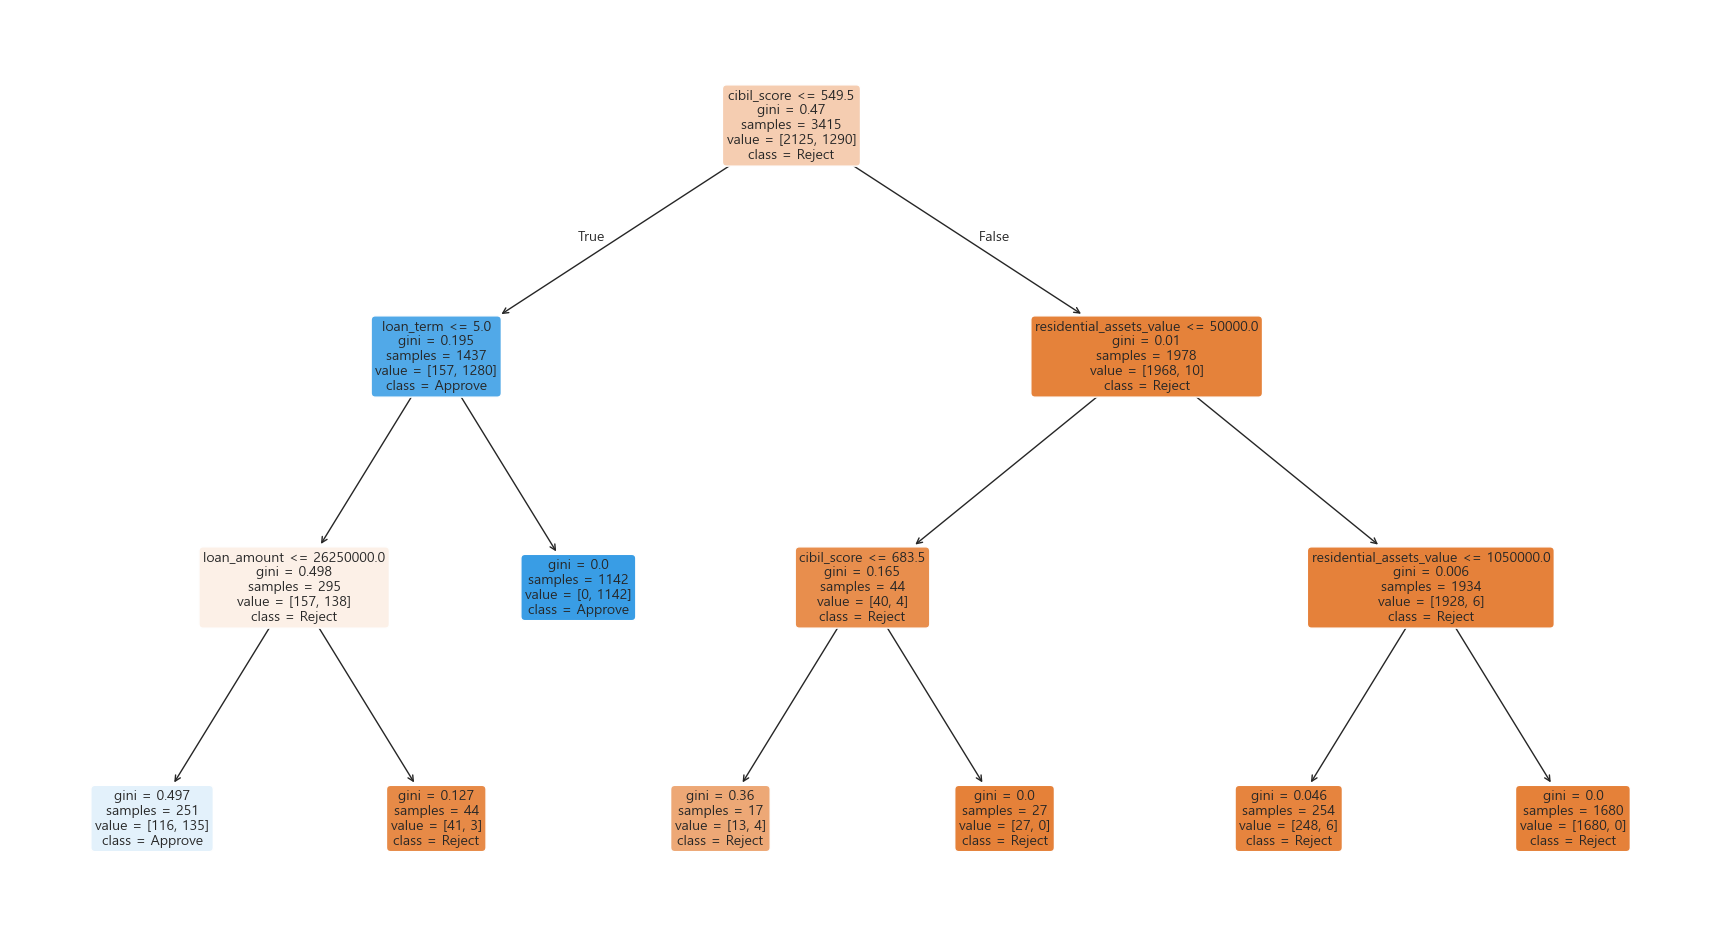

In [53]:
plt.figure(figsize=(22,12))
plot_tree(dtc2,filled=True,rounded=True,fontsize=10,feature_names=X.columns,class_names=['Reject','Approve'])
plt.show()

루트 노드 분기 기준이 되는 변수는 cibil_score(신용점수)이며, 신용점수에 따라 대출 가능 금액이 달라지기 떄문에 대출 심사에 중요합니다.

# 7.모델 평가(혼동행렬&리포트)

In [54]:
from sklearn.metrics import confusion_matrix ,recall_score,precision_score,f1_score

==================== 오차행렬 confusion_matrix ====================
[[510  21]
 [  3 320]]


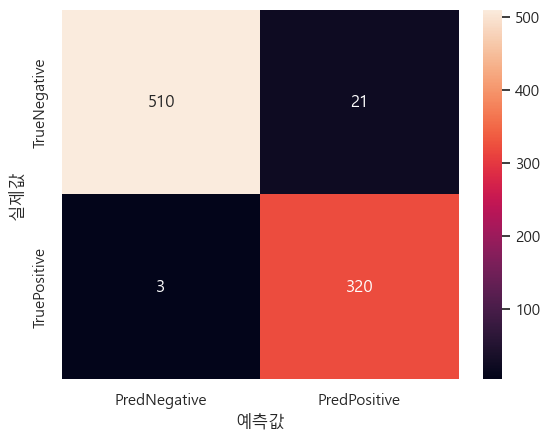


              precision    recall  f1-score   support

    Approved       0.99      0.96      0.98       531
    Rejected       0.94      0.99      0.96       323

    accuracy                           0.97       854
   macro avg       0.97      0.98      0.97       854
weighted avg       0.97      0.97      0.97       854



In [61]:
# 오차행열 confusion_matrix 출력하기
print("="*20,'오차행렬 confusion_matrix','='*20)
print(confusion_matrix(y_test,pred2))
cm = confusion_matrix(y_test,pred2)
class_names = ['Negative','Positive']
cm_df = pd.DataFrame(cm,index=[f"True{c}" for c in class_names],
                    columns=[f"Pred{c}" for c in class_names])

#히트맵으로 오차행렬 시각화
sns.heatmap(cm_df,annot=True,fmt='d')
plt.ylabel('실제값')
plt.xlabel('예측값')
plt.show()
print()
print(classification_report(y_test,pred2))

* 승인해야하는데 거절한 경우는 21건이고
* 거절해야하는데 승인한 경우는 3건이다.
더 치명적인건 거절해야하는데 승인한 경우가 더 치명적이라고 생각한다.

# 8. 변수 중요도

In [71]:
feature_importances = dtc2.feature_importances_

In [79]:
dtc2.feature_names_in_

array(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'], dtype=object)

In [84]:
feature_importances_df = pd.DataFrame(feature_importances,index=dtc2.feature_names_in_,columns=['importances'])
feature_importances_df.sort_values(by='importances',ascending=False)

,importances
cibil_score,0.896905
loan_term,0.091137
loan_amount,0.011334
residential_assets_value,0.000624
self_employed,0.000000
education,0.000000
no_of_dependents,0.000000
loan_id,0.000000
income_annum,0.000000
commercial_assets_value,0.000000


상위 3개는 신용점수,상환 기간,대출 금액 순이고 은행입장에서는 신용 점수가 높으면 대출을 갚을 확률이 높으며,기간이 짧을 수록 갚을확률이 높고 금액이 크면 커질 수록 갚을 능력은 떨어지기 때문에 3개의 변수가 대출 승인여부에 많을 영향을 준다는 것이 납득됩니다.

# 9. 가지치기 실험

============================== 1 ==============================
0.9637002341920374

============================== 2 ==============================
0.9613583138173302

============================== 3 ==============================
0.9718969555035128

============================== 4 ==============================
0.968384074941452

============================== 5 ==============================
0.9765807962529274

============================== 6 ==============================
0.9695550351288056



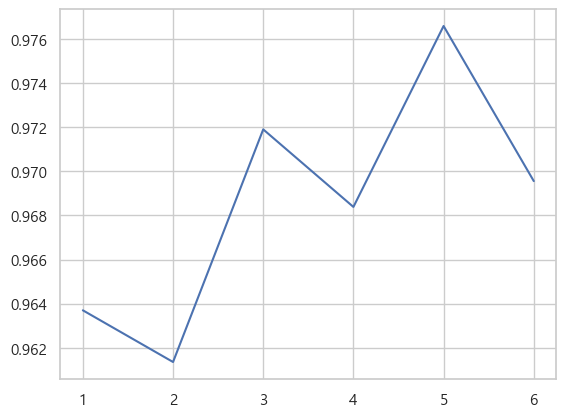

In [92]:
x_num = []
y_num =[]
for i in range(1, 7):
    dtc = DecisionTreeClassifier(max_depth=i, random_state=42)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print("="*30, i, "="*30)
    print(accuracy_score(y_test, pred))
    print()
    x_num.append(i)
    y_num.append(accuracy_score(y_test,pred))
plt.figure()
plt.plot(x_num,y_num)

깊이가 깊어 질수록 정확도가 올라가는 경향을 보여주고 있다.

# 10 비지니스/핀테크 관점 해석

### 트리의 첫 분기(루트 노드)는 무엇인가요? 이건 어떤 리스크 판단 기준을 시사하나요?
트리의 첫 분기는 신용 점수이고, 신용 점수가 높을수록 돈을 갚을 수 있을 확률이 높아서 리스크가 줄어든다는 것을 의미합니다.
### 잘못 승인(회수 불가능 위험) vs 잘못 거절(매출 기회 상실) 중 어떤 게 금융기관 입장에서 더 치명적인가요?
기업 입장에서는 잘못 승인이 더 치명적이라고 생각합니다. 잘못된 승인이 많아 질 수록 회사의 손실은 커질 것이고 재무에 큰 영향을 미칠것이라고 생각하기 떄문입니다.
### 실제 핀테크 심사 서비스에 이 트리를 그대로 쓰려면 어떤 공정성·설명가능성(Explainability) 이슈가 있나요?
민감속성이 포함 되어 있어 특정 집단에 불리한 결과를 줄 수도 있고,트리 깊이가 커리면 이해하기 어려워 진다는 문제도 있습니다.